In [ ]:
# Этап 1: загрузка и провверка данных
!pip install -q tensorflow
from google.colab import files
import zipfile, os

print("1. Загрузить архив: Нажмите 'Выбрать файлы' и выберите архив датасета")
uploaded = files.upload()

print("\n2. Распаковка архива...")
zip_name = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_name, 'r') as z:
    z.extractall('/content/')

print("\n3. Проверка структуры: ")
DATA_PATH = "/content/dataset"
expected_classes = ['Бытовые отходы', 'Обувь', 'Пластик', 'Макулатура', 'Металл', 'Стекло', 'Одежда', 'Картон', 'Биологические отходы', 'Батарейки']

if not os.path.exists(DATA_PATH):
    print(f"Критическая ошибка: Папка '{DATA_PATH}' не создана.")
    print("   В архиве должна быть папка 'dataset/' на верхнем уровне.")
else:
    found_classes = sorted([d for d in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, d))])
    print(f"   Найдено папок: {len(found_classes)}")

    # Проверяем каждое ожидаемое название
    missing = []
    for exp in expected_classes:
        if exp not in found_classes:
            missing.append(exp)

    if not missing and len(found_classes) == 10:
        print("   Все 10 необходимых классов обнаружены!")
        for cls in found_classes:
            img_count = len([f for f in os.listdir(os.path.join(DATA_PATH, cls)) if f.endswith(('.jpg', '.png'))])
            print(f"      - {cls}: {img_count} изображ.")
    else:
        print("   Структура неверна!")
        print("   Отсутствующие или лишние папки:", missing)
        print("   Обучение будет бесполезным. Исправьте archive и перезапустите среду.")
        raise SystemExit("Остановка из-за неверной структуры данных.")

print("\n" + "="*60)
print("Этап 1 завершен. Приступить к обучению модели.")

1. Загрузить архив: Нажмите 'Выбрать файлы' и выберите архив датасета


Saving dataset.zip to dataset.zip

2. Распаковка архива...

3. Проверка структуры: 
   Найдено папок: 10
   Все 10 необходимых классов обнаружены!
      - Батарейки: 500 изображ.
      - Биологические отходы: 500 изображ.
      - Бытовые отходы: 500 изображ.
      - Картон: 500 изображ.
      - Макулатура: 500 изображ.
      - Металл: 500 изображ.
      - Обувь: 500 изображ.
      - Одежда: 500 изображ.
      - Пластик: 500 изображ.
      - Стекло: 500 изображ.

Этап 1 завершен. Приступить к обучению модели.


 Начинаем обучение модели...
Found 4000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
 Классы для обучения: {'Батарейки': 0, 'Биологические отходы': 1, 'Бытовые отходы': 2, 'Картон': 3, 'Макулатура': 4, 'Металл': 5, 'Обувь': 6, 'Одежда': 7, 'Пластик': 8, 'Стекло': 9}
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
 Этап 1: Дообучение верхних слоёв...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.5702 - loss: 1.3036 - val_accuracy: 0.8130 - val_loss: 0.5882
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.8529 - loss: 0.4317 - val_accuracy: 0.8400 - val_loss: 0.5331
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.8810 - loss: 0.3544 - val_accuracy: 0.8650 - val_loss: 0.4787
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.8960 - loss: 0.3045 - val_accuracy: 0.8510 - val_loss: 0.5208
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 291s 2s/step - accuracy: 0.9110 - loss: 0.2835 - val_accuracy: 0.8710 - val_loss: 0.4750
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - accuracy: 0.9129 - loss: 0.2685 - val_accuracy: 0.8530 - val_loss: 0.5080
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.9354 - loss: 0.2108 - val_accuracy: 0.8430 - val_loss: 0.5792
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.9272 - loss: 0.2274 - val_accu

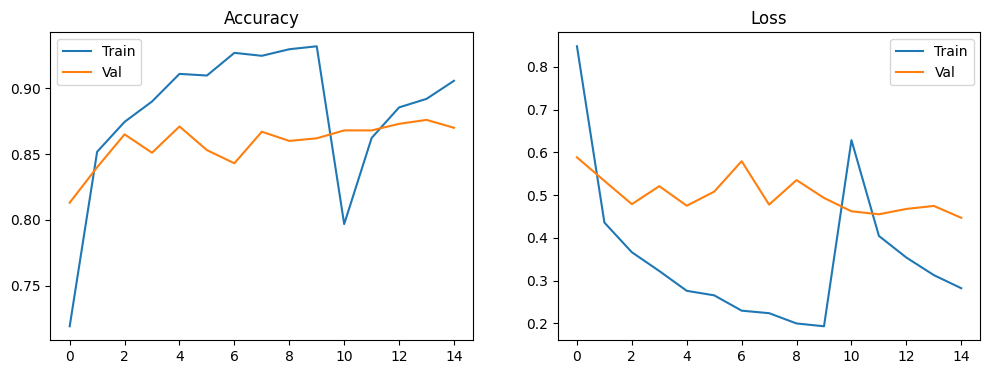

Обучение завершено!


In [ ]:
# Этап 2. Обучение модели ===
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

print(" Начинаем обучение модели...")
# Параметры
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
DATA_PATH = "/content/dataset"  # Путь подтвержден на Этапе 1

# Аугментация и генераторы данных
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    DATA_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    DATA_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

print(f" Классы для обучения: {train_generator.class_indices}")

# Создание модели на основе MobileNetV2
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Заморозка

model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 10 выходов!
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(" Этап 1: Дообучение верхних слоёв...")
history = model.fit(train_generator, validation_data=val_generator, epochs=10)  # Для начала 10 эпох

print(" Этап 2: Тонкая настройка (Fine-Tuning)...")
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history_fine = model.fit(train_generator, validation_data=val_generator, epochs=5)  # Ещё 5 эпох

# Графики
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['Train', 'Val'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + history_fine.history['loss'])
plt.plot(history.history['val_loss'] + history_fine.history['val_loss'])
plt.title('Loss')
plt.legend(['Train', 'Val'])
plt.show()

print("Обучение завершено!")

In [ ]:
# Этап 3: сохранение результатов
print("Конвертируем модель в TensorFlow Lite...")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open('/content/waste_classifier.tflite', 'wb') as f:
    f.write(tflite_model)
print("Модель сохранена: waste_classifier.tflite")

print("Сохраняем метки классов...")
labels = list(train_generator.class_indices.keys())
with open('/content/labels.txt', 'w') as f:
    for label in labels:
        f.write(label + '\n')
print(f"Метки сохранены ({len(labels)}): labels.txt")
print("\n Файлы готовы к скачиванию!")

# Скачивание
from google.colab import files
files.download('/content/waste_classifier.tflite')
files.download('/content/labels.txt')

Конвертируем модель в TensorFlow Lite...
Saved artifact at '/tmp/tmp082okx5p'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  138690466526224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138690466526416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138690466527760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138690466529104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138690466528912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138690466527568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138690443364112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138690443364304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138690443363536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138690443362960: TensorSpec(shape=(), 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>